Generalized Koch Curve Generation (Order=6)

Target D     Angle (deg)     Points      
----------------------------------------------------------------------
1.1          40.3            4097        
1.2          54.0            4097        
1.3          63.1            4097        
1.4          69.8            4097        
1.5          74.9            4097        
1.6          79.1            4097        
1.7          82.5            4097        
1.8          85.4            4097        
1.9          87.9            4097        

Saved: koch_curves_all.png


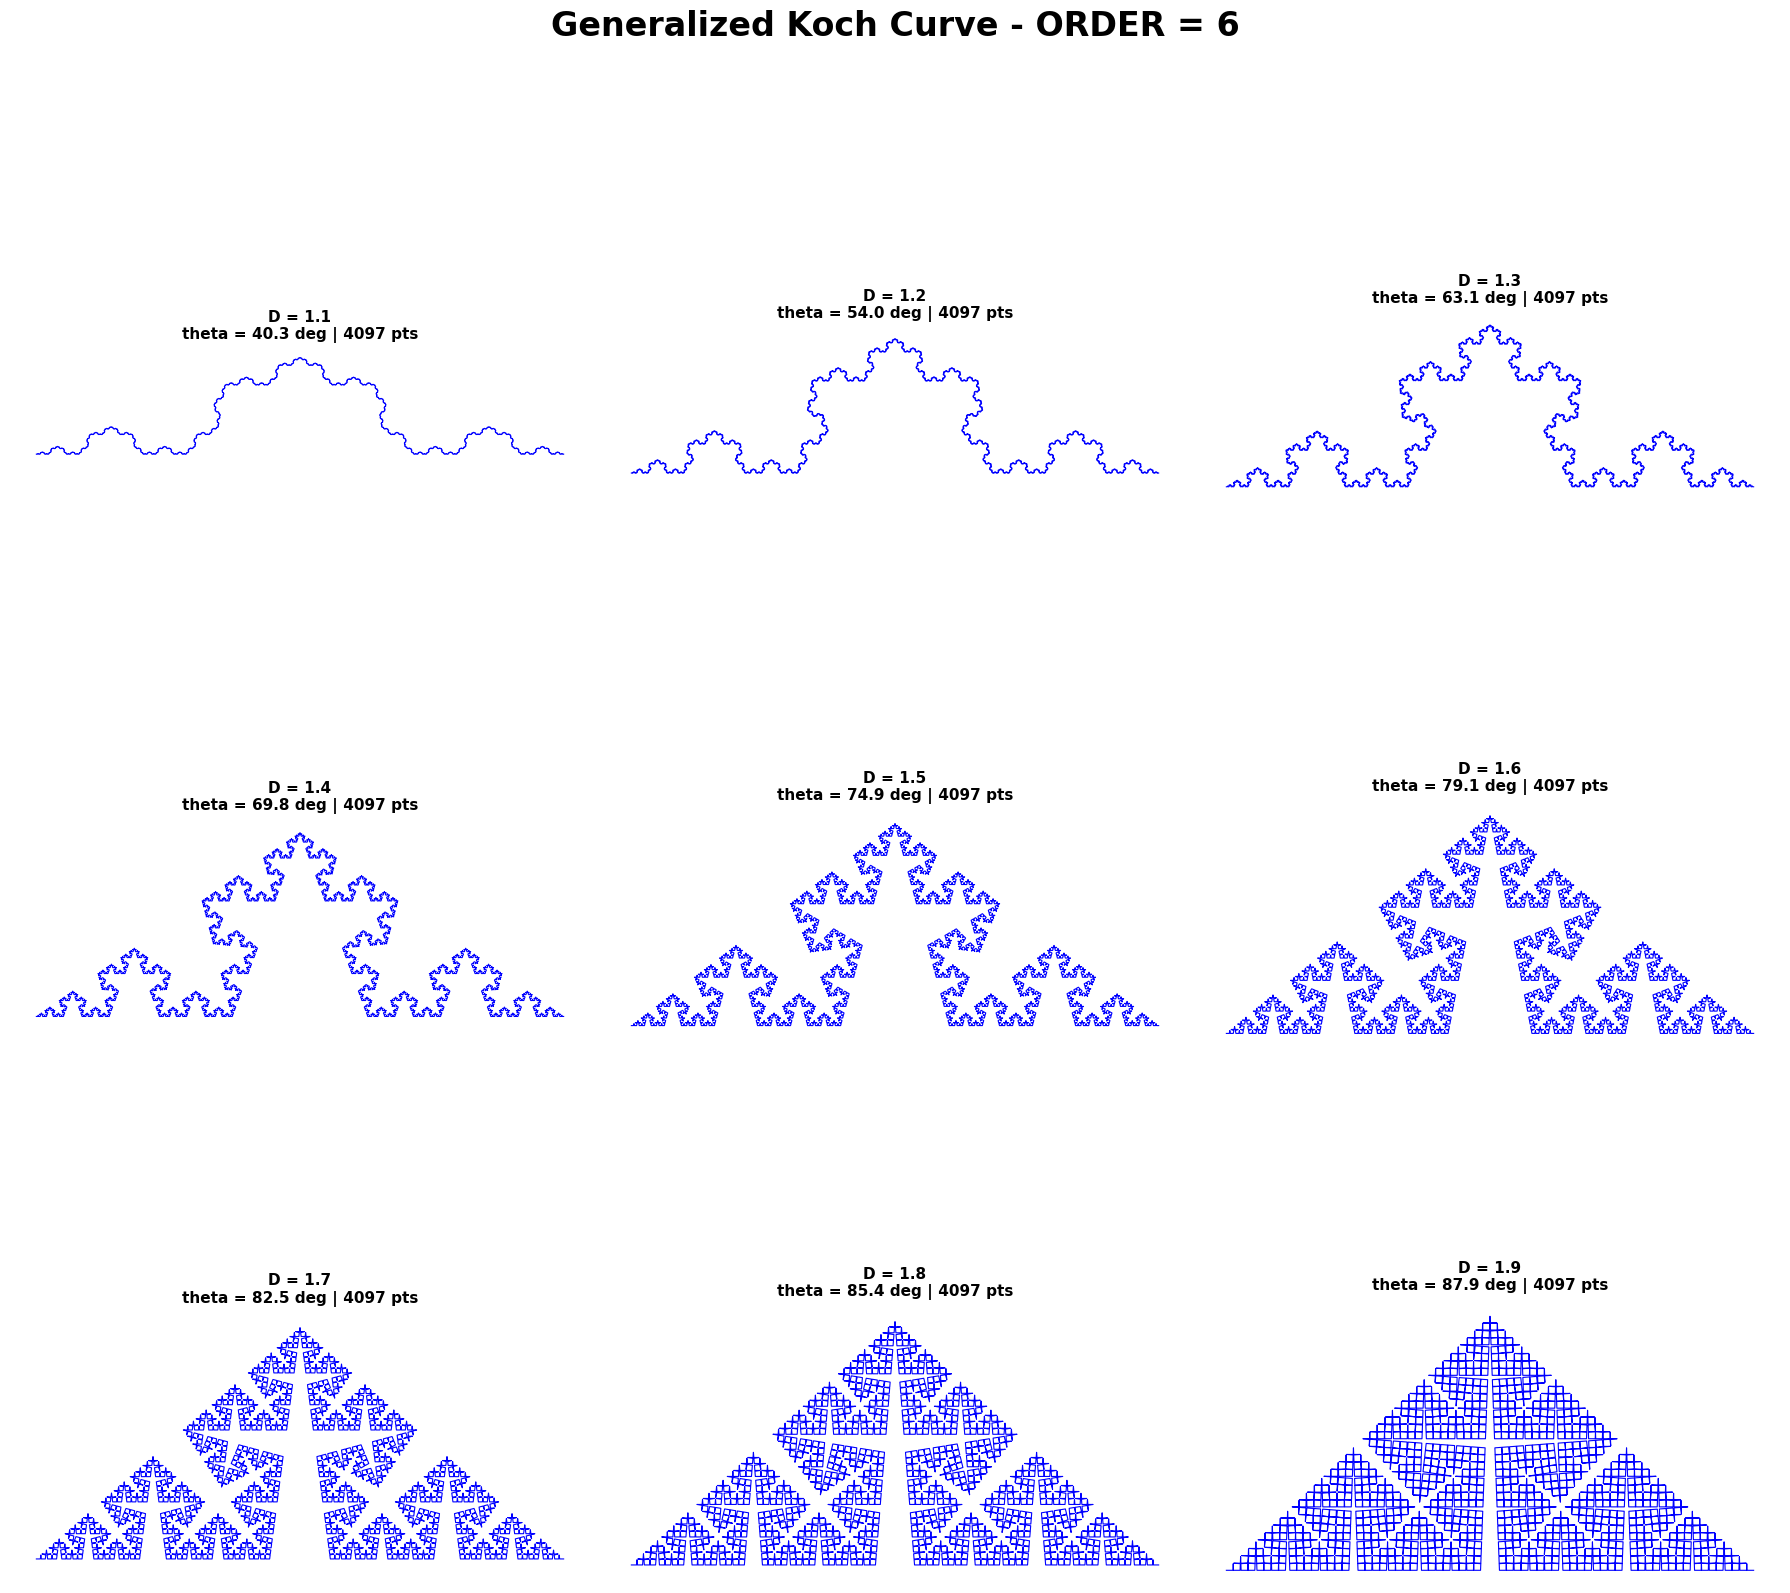


Completed!

Features:
- Simplest fractal curve
- Continuous dimension control (1D -> 2D)
- D <= 1.262 (theta <= 60 deg): No self-intersection
- D > 1.262: Self-intersection occurs (mathematically correct)

Speed options:
- order=4: Ultra-fast (1 sec)
- order=6: Fast (3 sec)
- order=8: High quality (10 sec)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def theta_from_D(D):
    """Calculate angle from fractal dimension"""
    if D <= 1.0:
        return 0.0
    if D >= 2.0:
        return np.pi / 2
    
    cos_theta = (4.0 ** (1.0 / D)) / 2.0 - 1.0
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    return np.arccos(cos_theta)

def koch_curve(start_x, start_y, angle, length, depth, theta):
    """Recursive Koch curve generation"""
    if depth == 0:
        end_x = start_x + length * np.cos(angle)
        end_y = start_y + length * np.sin(angle)
        return [(start_x, start_y), (end_x, end_y)]
    
    s = 1.0 / (2.0 * (1.0 + np.cos(theta)))
    new_length = length * s
    
    points = []
    current_x, current_y = start_x, start_y
    current_angle = angle
    
    # Segment 1
    seg1 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg1[:-1])
    current_x, current_y = seg1[-1]
    
    # Segment 2 (left turn)
    current_angle += theta
    seg2 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg2[:-1])
    current_x, current_y = seg2[-1]
    
    # Segment 3 (right turn)
    current_angle -= 2 * theta
    seg3 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg3[:-1])
    current_x, current_y = seg3[-1]
    
    # Segment 4 (back to original direction)
    current_angle += theta
    seg4 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg4)
    
    return points

def generate_koch_curve(D, order=8, length=1.0):
    """Generate Koch curve with given fractal dimension"""
    theta = theta_from_D(D)
    points = koch_curve(0.0, 0.0, 0.0, length, order, theta)
    
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    
    return x, y, theta

# ==============================================================================
# Main execution
# ==============================================================================
if __name__ == "__main__":
    dimensions = np.arange(1.1, 2.0, 0.1)
    order = 6  # Dense fractal! (4=sparse, 6=dense, 8=very dense)
    
    print("=" * 70)
    print(f"Generalized Koch Curve Generation (Order={order})")
    print("=" * 70)
    
    # Create subplots
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    axes = axes.flatten()
    
    # Add main title with ORDER prominently displayed
    fig.suptitle(f'Generalized Koch Curve - ORDER = {order}', 
                 fontsize=24, fontweight='bold', y=0.995)
    
    print(f"\n{'Target D':<12} {'Angle (deg)':<15} {'Points':<12}")
    print("-" * 70)
    
    for idx, D_target in enumerate(dimensions):
        x, y, theta = generate_koch_curve(D_target, order=order)
        
        # Plot
        ax = axes[idx]
        ax.plot(x, y, 'b-', linewidth=0.8)
        ax.set_aspect('equal', adjustable='box')
        ax.axis('off')
        ax.set_title(
            f'D = {D_target:.1f}\n'
            f'theta = {np.degrees(theta):.1f} deg | {len(x)} pts',
            fontsize=11, fontweight='bold', pad=10
        )
        
        print(f"{D_target:<12.1f} {np.degrees(theta):<15.1f} {len(x):<12}")
    
    plt.tight_layout()
    plt.savefig('koch_curves_all.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("\nSaved: koch_curves_all.png")
    plt.show()
    
    print("\n" + "=" * 70)
    print("Completed!")
    print("=" * 70)
    print("\nFeatures:")
    print("- Simplest fractal curve")
    print("- Continuous dimension control (1D -> 2D)")
    print("- D <= 1.262 (theta <= 60 deg): No self-intersection")
    print("- D > 1.262: Self-intersection occurs (mathematically correct)")
    print("\nSpeed options:")
    print("- order=4: Ultra-fast (1 sec)")
    print("- order=6: Fast (3 sec)")
    print("- order=8: High quality (10 sec)")

Koch Curve with CORRECT Box Counting (Order=6)
Using MULTIPLE scales: [4, 8, 16, 32, 64] for accurate dimension

D_target   Angle      D_measured   Error      Points    
-------------------------------------------------------------------------------------
1.1        40.3       1.078        0.0219     4097      
1.2        54.0       1.243        0.0431     4097      
1.3        63.1       1.254        0.0459     4097      
1.4        69.8       1.409        0.0093     4097      
1.5        74.9       1.490        0.0100     4097      
1.6        79.1       1.643        0.0425     4097      
1.7        82.5       1.689        0.0107     4097      
1.8        85.4       1.760        0.0402     4097      
1.9        87.9       1.817        0.0827     4097      

✅ Saved: koch_box_counting_correct.png


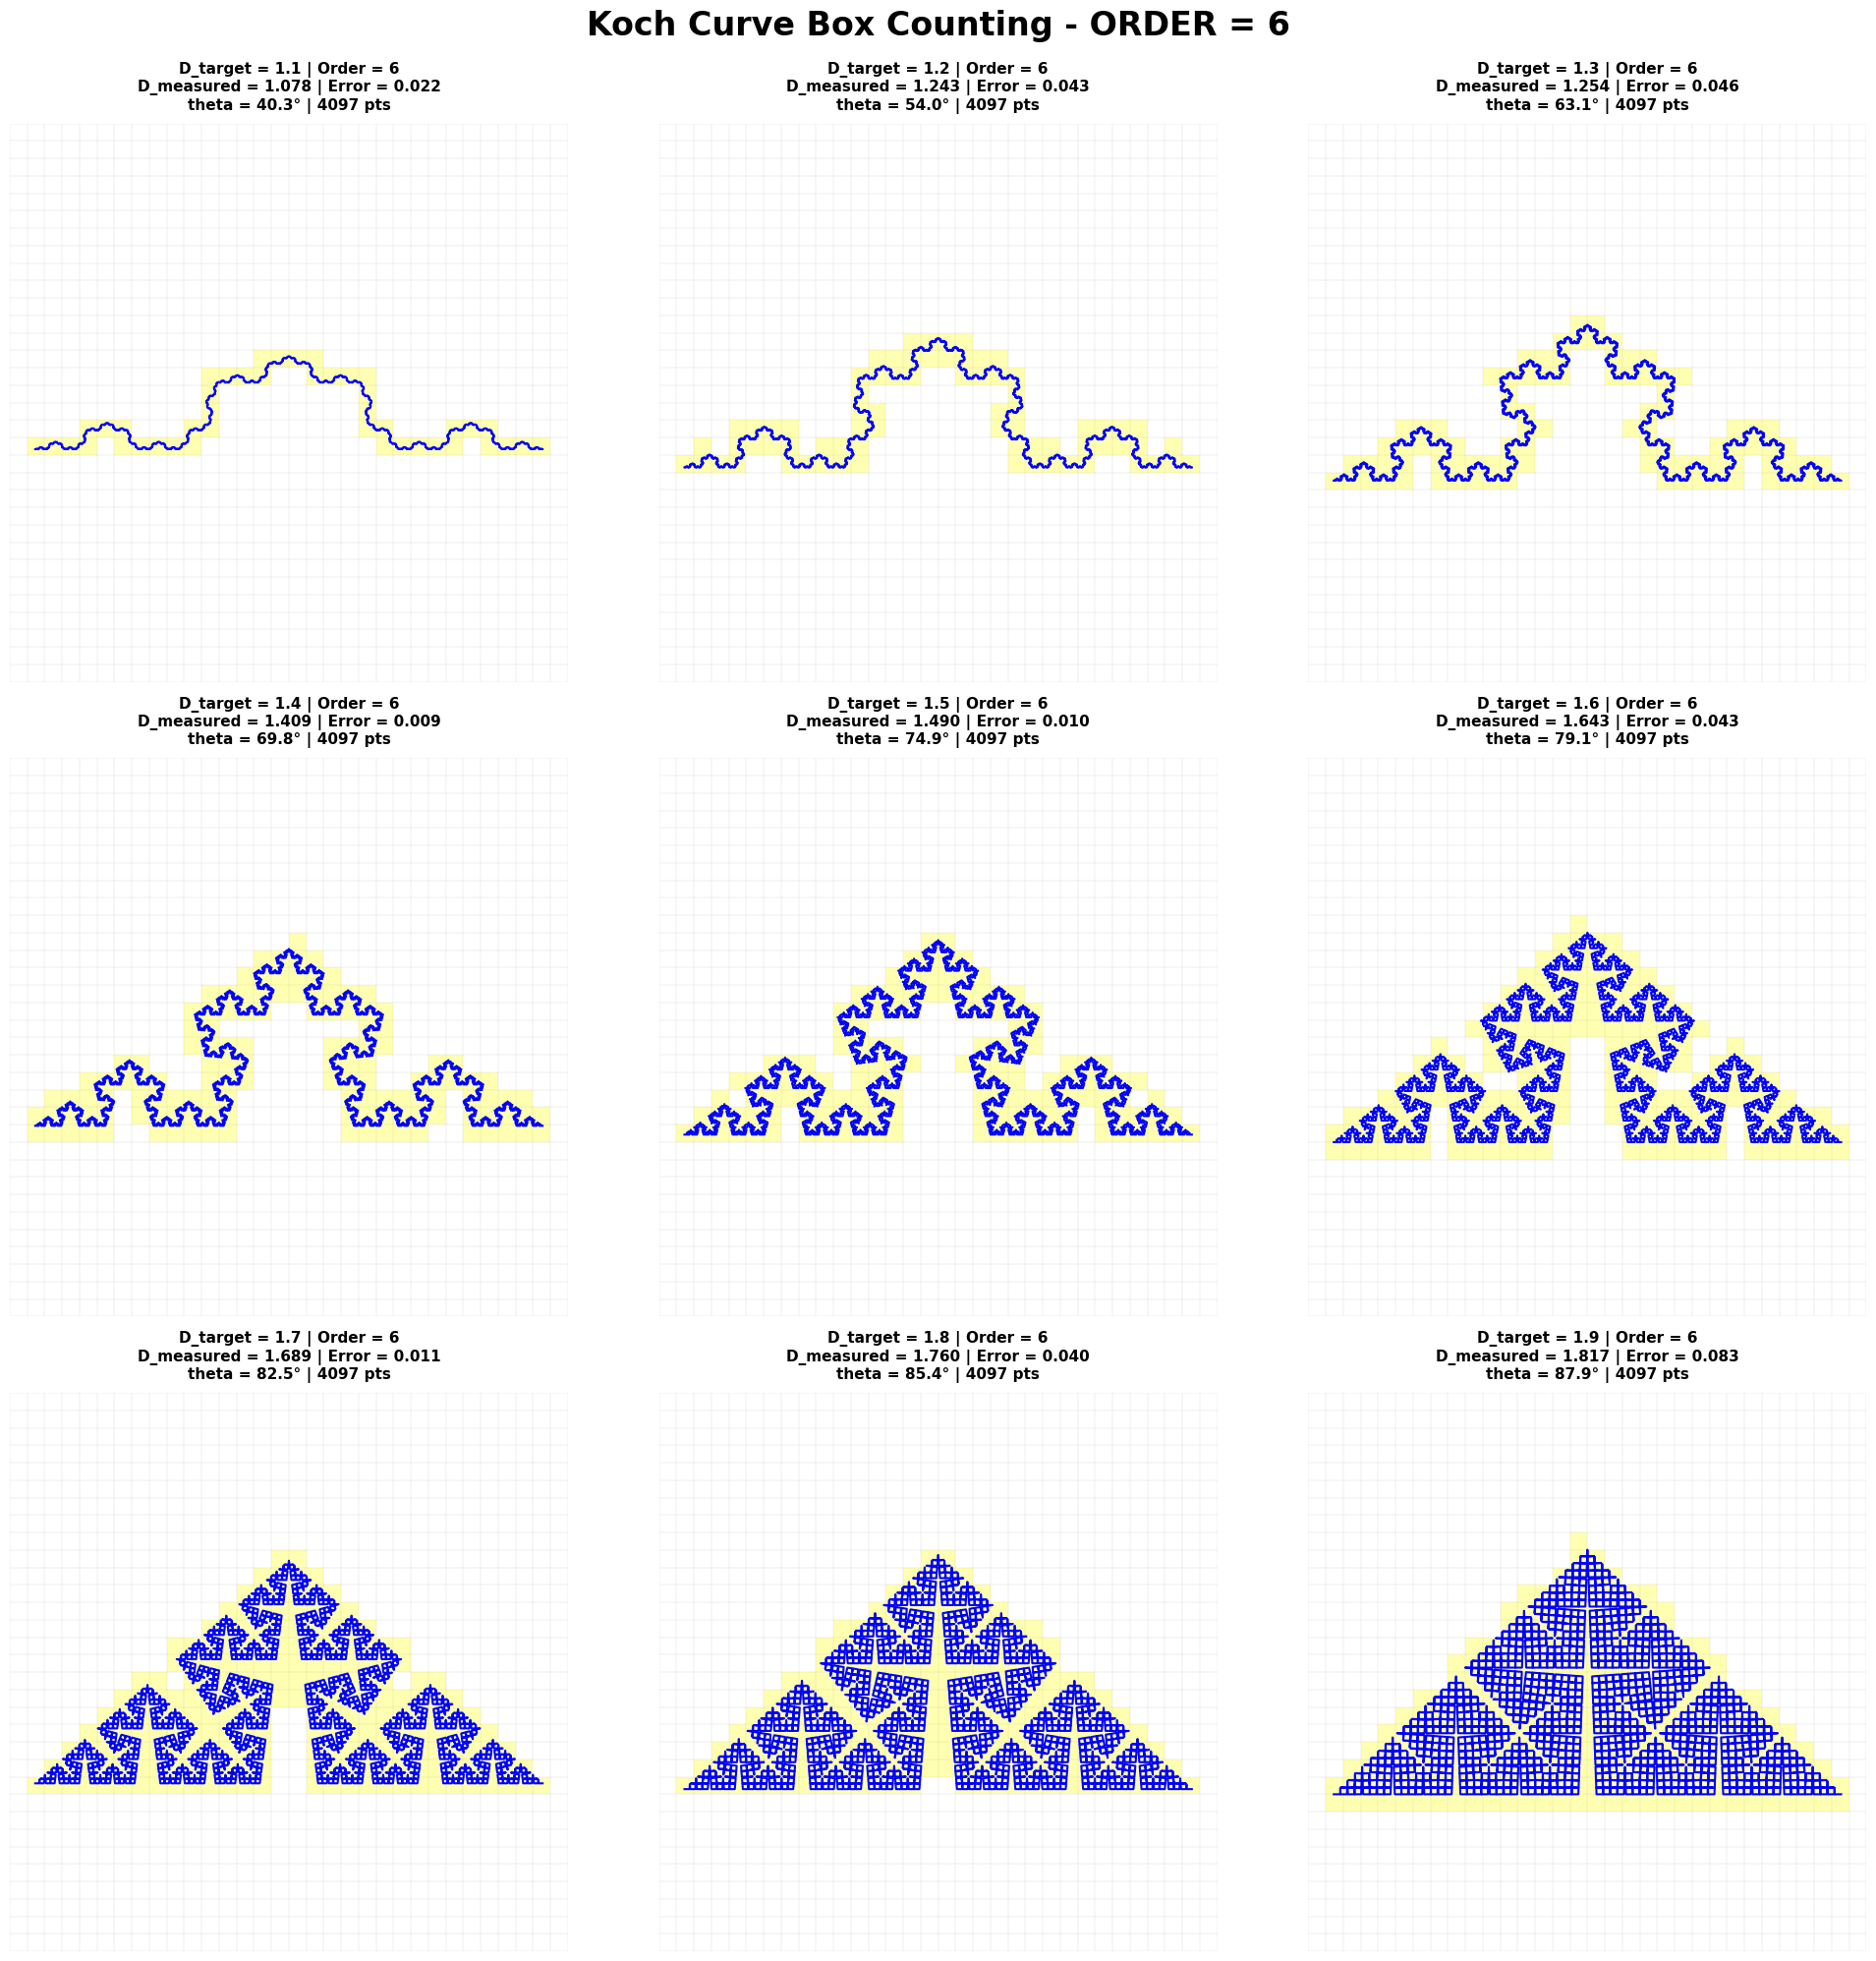


📊 Box Counting Analysis Complete!
Average Error: 0.0340
Max Error: 0.0827

✅ KEY IMPROVEMENT:
- Now using MULTIPLE scales [4, 8, 16, 32, 64] boxes
- Calculating dimension from log-log slope (CORRECT method)
- Order increased to 6 for better fractal structure
- All boxes are SQUARE (isotropic measurement)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def theta_from_D(D):
    """Calculate angle from fractal dimension"""
    if D <= 1.0:
        return 0.0
    if D >= 2.0:
        return np.pi / 2
    
    cos_theta = (4.0 ** (1.0 / D)) / 2.0 - 1.0
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    return np.arccos(cos_theta)

def koch_curve(start_x, start_y, angle, length, depth, theta):
    """Recursive Koch curve generation"""
    if depth == 0:
        end_x = start_x + length * np.cos(angle)
        end_y = start_y + length * np.sin(angle)
        return [(start_x, start_y), (end_x, end_y)]
    
    s = 1.0 / (2.0 * (1.0 + np.cos(theta)))
    new_length = length * s
    
    points = []
    current_x, current_y = start_x, start_y
    current_angle = angle
    
    seg1 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg1[:-1])
    current_x, current_y = seg1[-1]
    
    current_angle += theta
    seg2 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg2[:-1])
    current_x, current_y = seg2[-1]
    
    current_angle -= 2 * theta
    seg3 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg3[:-1])
    current_x, current_y = seg3[-1]
    
    current_angle += theta
    seg4 = koch_curve(current_x, current_y, current_angle, new_length, depth - 1, theta)
    points.extend(seg4)
    
    return points

def generate_koch_curve(D, order=6, length=1.0):
    """Generate Koch curve with given fractal dimension"""
    theta = theta_from_D(D)
    points = koch_curve(0.0, 0.0, 0.0, length, order, theta)
    
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    
    return x, y, theta

def count_boxes_at_scale(x, y, grid_size):
    """
    Count occupied boxes at a given grid scale
    Returns number of SQUARE boxes containing the curve
    """
    # Get coordinate bounds
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    
    # Find the MAXIMUM range to create a SQUARE domain
    x_range = x_max - x_min
    y_range = y_max - y_min
    max_range = max(x_range, y_range)
    
    # Add padding
    padding = 0.05
    max_range *= (1 + 2 * padding)
    
    # Center the square domain
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    domain_min = min(x_center - max_range / 2, y_center - max_range / 2)
    
    # Normalize to [0, 1] in SQUARE domain
    x_norm = (x - (x_center - max_range / 2)) / max_range
    y_norm = (y - (y_center - max_range / 2)) / max_range
    
    # Count occupied boxes
    occupied_boxes = set()
    for xi, yi in zip(x_norm, y_norm):
        box_x = int(xi * grid_size)
        box_y = int(yi * grid_size)
        # Clip to valid range
        box_x = min(max(box_x, 0), grid_size - 1)
        box_y = min(max(box_y, 0), grid_size - 1)
        occupied_boxes.add((box_x, box_y))
    
    return len(occupied_boxes), max_range

def calculate_fractal_dimension(x, y, grid_sizes=None):
    """
    Calculate fractal dimension using box counting method
    across MULTIPLE scales (this is the correct way!)
    """
    if grid_sizes is None:
        grid_sizes = [4, 8, 16, 32, 64]
    
    box_counts = []
    box_sizes = []
    
    _, max_range = count_boxes_at_scale(x, y, grid_sizes[0])
    
    for grid_size in grid_sizes:
        num_boxes, _ = count_boxes_at_scale(x, y, grid_size)
        box_size = max_range / grid_size  # Physical size of each box
        
        box_counts.append(num_boxes)
        box_sizes.append(box_size)
    
    # Linear regression on log-log plot
    log_sizes = np.log(box_sizes)
    log_counts = np.log(box_counts)
    
    # D = -slope of log(N) vs log(ε)
    coeffs = np.polyfit(log_sizes, log_counts, 1)
    D_measured = -coeffs[0]  # Negative of slope
    
    return D_measured, box_sizes, box_counts

def draw_box_counting_grid(ax, x, y, grid_size=32):
    """Draw SQUARE box counting grid with one specific scale"""
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    
    x_range = x_max - x_min
    y_range = y_max - y_min
    max_range = max(x_range, y_range)
    
    padding = 0.05
    max_range *= (1 + 2 * padding)
    
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    x_min = x_center - max_range / 2
    x_max = x_center + max_range / 2
    y_min = y_center - max_range / 2
    y_max = y_center + max_range / 2
    
    box_size = max_range / grid_size
    
    # Normalize coordinates
    x_norm = (x - x_min) / max_range
    y_norm = (y - y_min) / max_range
    
    # Find occupied boxes
    occupied_boxes = set()
    for xi, yi in zip(x_norm, y_norm):
        box_x = int(xi * grid_size)
        box_y = int(yi * grid_size)
        box_x = min(max(box_x, 0), grid_size - 1)
        box_y = min(max(box_y, 0), grid_size - 1)
        occupied_boxes.add((box_x, box_y))
    
    # Draw grid lines
    for i in range(grid_size + 1):
        x_pos = x_min + i * box_size
        ax.axvline(x=x_pos, color='gray', linewidth=0.3, alpha=0.3)
    
    for j in range(grid_size + 1):
        y_pos = y_min + j * box_size
        ax.axhline(y=y_pos, color='gray', linewidth=0.3, alpha=0.3)
    
    # Highlight occupied boxes
    for (box_x, box_y) in occupied_boxes:
        rect_x = x_min + box_x * box_size
        rect_y = y_min + box_y * box_size
        rect = Rectangle(
            (rect_x, rect_y), box_size, box_size,
            facecolor='yellow', edgecolor='none', alpha=0.3
        )
        ax.add_patch(rect)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    return len(occupied_boxes)

# ==============================================================================
# Main execution
# ==============================================================================
if __name__ == "__main__":
    dimensions = np.arange(1.1, 2.0, 0.1)
    order = 6  # 6=dense(4097pts), 4=sparse(257pts)
    display_grid_size = 32  # Grid size for visualization
    
    print("=" * 85)
    print(f"Koch Curve with CORRECT Box Counting (Order={order})")
    print("Using MULTIPLE scales: [4, 8, 16, 32, 64] for accurate dimension")
    print("=" * 85)
    
    # Create subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    axes = axes.flatten()
    
    # Add main title with ORDER prominently displayed
    fig.suptitle(f'Koch Curve Box Counting - ORDER = {order}', 
                 fontsize=24, fontweight='bold', y=0.995)
    
    print(f"\n{'D_target':<10} {'Angle':<10} {'D_measured':<12} {'Error':<10} {'Points':<10}")
    print("-" * 85)
    
    results = []
    
    for idx, D_target in enumerate(dimensions):
        x, y, theta = generate_koch_curve(D_target, order=order)
        
        # Calculate dimension using MULTIPLE scales
        D_measured, box_sizes, box_counts = calculate_fractal_dimension(x, y)
        error = abs(D_measured - D_target)
        
        results.append((D_target, D_measured, error))
        
        ax = axes[idx]
        
        # Draw grid at display scale
        num_boxes = draw_box_counting_grid(ax, x, y, grid_size=display_grid_size)
        
        # Draw curve
        ax.plot(x, y, 'b-', linewidth=1.5, zorder=10)
        
        ax.set_aspect('equal', adjustable='box')
        ax.axis('off')
        ax.set_title(
            f'D_target = {D_target:.1f} | Order = {order}\n'
            f'D_measured = {D_measured:.3f} | Error = {error:.3f}\n'
            f'theta = {np.degrees(theta):.1f}° | {len(x)} pts',
            fontsize=11, fontweight='bold', pad=10
        )
        
        print(f"{D_target:<10.1f} {np.degrees(theta):<10.1f} {D_measured:<12.3f} "
              f"{error:<10.4f} {len(x):<10}")
    
    plt.tight_layout()
    plt.savefig('koch_box_counting_correct.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("\n✅ Saved: koch_box_counting_correct.png")
    plt.show()
    
    # Summary statistics
    errors = [r[2] for r in results]
    print("\n" + "=" * 85)
    print("📊 Box Counting Analysis Complete!")
    print(f"Average Error: {np.mean(errors):.4f}")
    print(f"Max Error: {np.max(errors):.4f}")
    print("=" * 85)
    print("\n✅ KEY IMPROVEMENT:")
    print("- Now using MULTIPLE scales [4, 8, 16, 32, 64] boxes")
    print("- Calculating dimension from log-log slope (CORRECT method)")
    print("- Order increased to 6 for better fractal structure")
    print("- All boxes are SQUARE (isotropic measurement)")